Combined Cycle Power Plant Data Set
The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

(a) Download the Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

In [1]:
import xlrd
import pandas as pd
import csv
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


In [2]:
data_excel = "/Users/myy/Desktop/DSCI552_HW2/data/CCPP/Folds5x2_pp.xlsx"
xlsx = pd.ExcelFile(data_excel)
data = pd.read_excel(xlsx,"Sheet1",index_col = None)

print(data.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


(b) Exploring the data:

i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
print("size of columns:", data.columns.size)
print("size of rows:", len(data))

print("Columns")
print("AT: Average Temperature\n",
      "V: Exhaust Vacuum\n",
      "AP: Ambient Pressure\n",
      "RH: Relative Humidity\n",
      "PE: electrical energy output.")

print("Each row represent an observeration")

size of columns: 5
size of rows: 9568
Columns
AT: Average Temperature
 V: Exhaust Vacuum
 AP: Ambient Pressure
 RH: Relative Humidity
 PE: electrical energy output.
Each row represent an observeration


ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your ﬁndings.

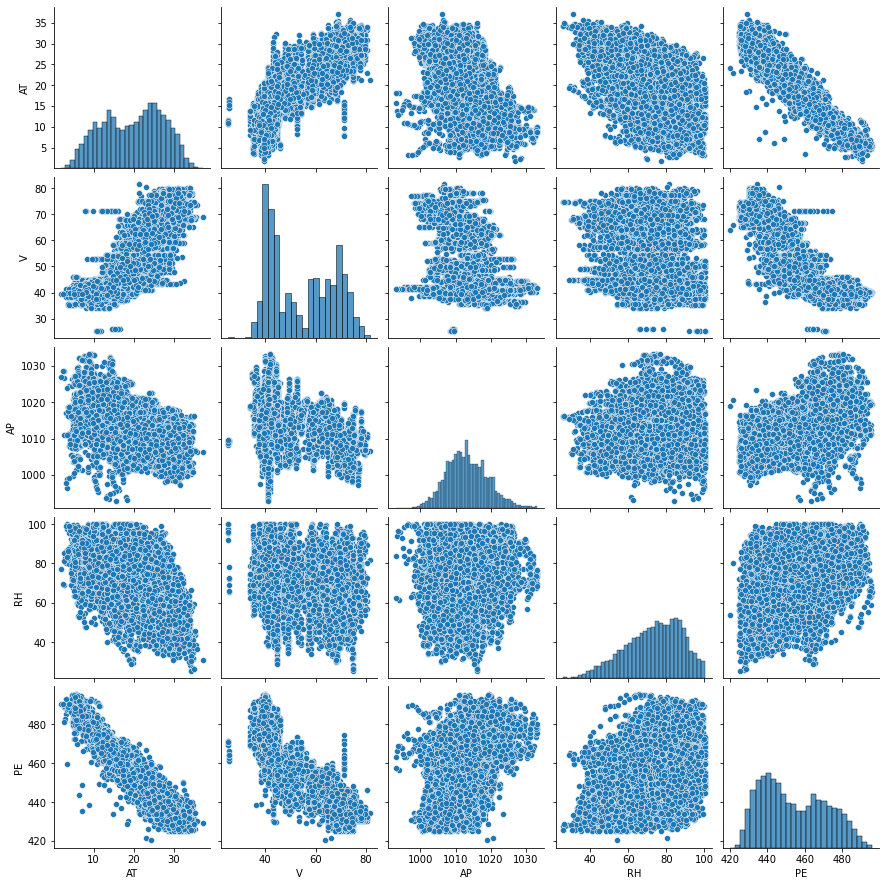

In [4]:
sns.pairplot(data=data)

=> The linear correlation between AT and PE, V and PE are clear, unlike AP and PE, RH and PE.

iii. What are the mean, the median, range, ﬁrst and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
#Metrics Overview
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
#All Metrics
data_range = (data.max() - data.min())
mean = data.mean()
median = data.median()
quartile1 = data.quantile(0.25)
quartile3 = data.quantile(0.75)
iqr = data.quantile(.75) - data.quantile(.25)

In [7]:
stat = {"data":["mean","median","range","1st quartile","3rd quartile","IQR range"],
        "AT":[mean[0],median[0],data_range[0],quartile1[0],quartile3[0],iqr[0]], 
        "V":[mean[1],median[1],data_range[1],quartile1[1],quartile3[1],iqr[1]],
        "AP":[mean[2],median[2],data_range[2],quartile1[2],quartile3[2],iqr[2]],
        "RH":[mean[3],median[3],data_range[3],quartile1[3],quartile3[3],iqr[3]],
        "PE":[mean[4],median[4],data_range[4],quartile1[4],quartile3[4],iqr[4]]}
table = pd.DataFrame(stat)

In [8]:
print(table)

           data         AT          V           AP         RH          PE
0          mean  19.651231  54.305804  1013.259078  73.308978  454.365009
1        median  20.345000  52.080000  1012.940000  74.975000  451.550000
2         range  35.300000  56.200000    40.410000  74.600000   75.500000
3  1st quartile  13.510000  41.740000  1009.100000  63.327500  439.750000
4  3rd quartile  25.720000  66.540000  1017.260000  84.830000  468.430000
5     IQR range  12.210000  24.800000     8.160000  21.502500   28.680000


(c) For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

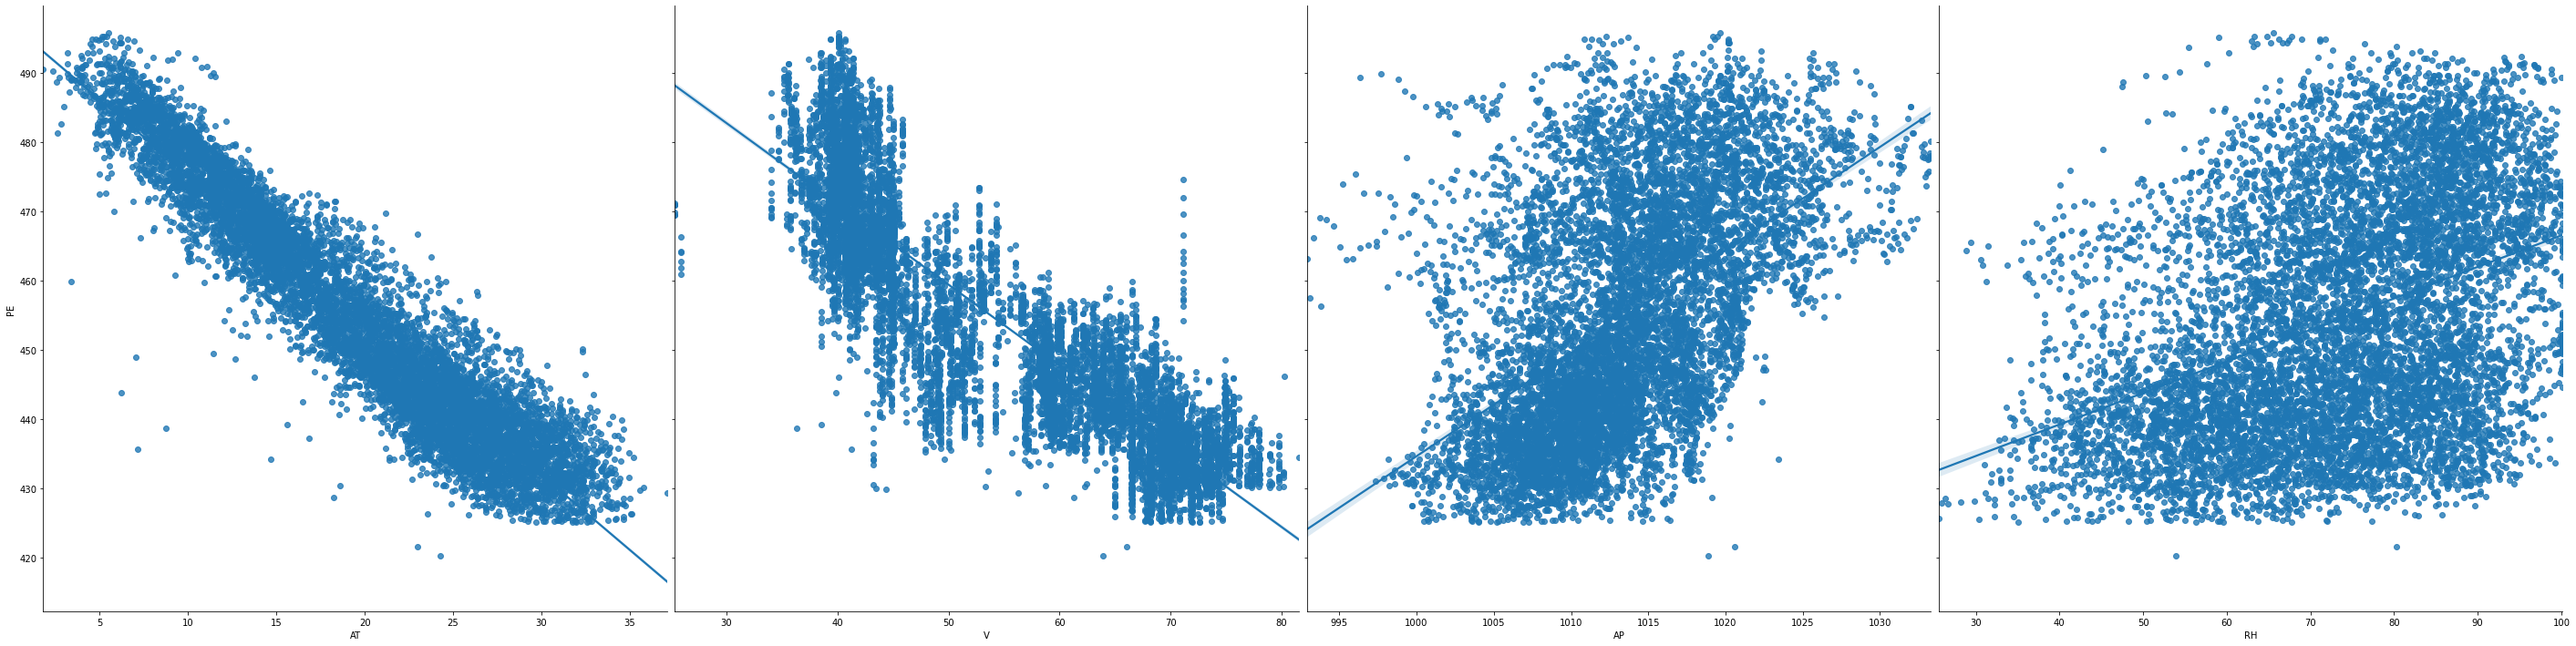

In [9]:
sns.pairplot(data=data, x_vars=["AT","V","AP","RH"],y_vars="PE",height=10,kind="reg")

In [10]:
x_train = ["AT","V","AP","RH"]
linreg = LinearRegression()
y_train = data["PE"]

for predictor in x_train:     
    model = linreg.fit(data[[predictor]],y_train)
    print("Predictor: ",predictor)
    print("Linear Coefficient: ",linreg.coef_)
    
    x_predictor = data[predictor].values
    x_predictor = x_predictor.reshape(-1,1)
    y_response = data["PE"].values
    y_response = y_response.reshape(-1,1)
    x_predictor = sm.add_constant(x_predictor)
    stat_model = sm.OLS(y_response,x_predictor).fit()
    print(stat_model.summary())


Predictor:  AT
Linear Coefficient:  [-2.17131996]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:07:20   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In each model, the correlation between the predictor and the response is statistically significant.

There are some outliers that need to be removed.

(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H 0 : β j = 0?


In [11]:
x_train2 = data[["AT","V","AP","RH"]]
linreg = LinearRegression()
model = linreg.fit(x_train2,y_train) 
print(model.score(x_train2,y_train))
print(model)
print(linreg.intercept_)
print(linreg.coef_)

x_train2 = sm.add_constant(x_train2)
allpred_model = sm.OLS(y_train,x_train2).fit()
print(allpred_model.summary())


0.9286960898122536
LinearRegression()
454.60927431531
[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:07:20   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

=> For all predictors, we can reject H0

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coeﬃcients from 1c on the x-axis, and the multiple regression coeﬃcients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeﬃcient in a simple linear regression model is shown on the x-axis, and its coeﬃcient estimate in the multiple linear regression model is shown on the y-axis.

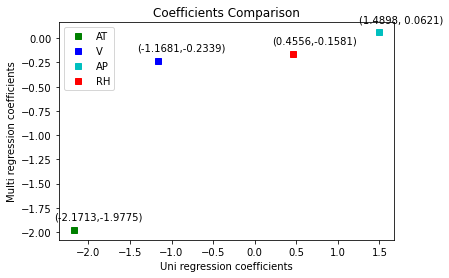

In [12]:
plt.title("Coefficients Comparison")
plt.xlabel("Uni regression coefficients")
plt.ylabel("Multi regression coefficients")

plt.plot(-2.1713,-1.9775,"gs",label="AT")
plt.annotate("(-2.1713,-1.9775)",xy=(-2.1713,-1.9775),xytext=(-20,10),textcoords="offset points")

plt.plot(-1.1681,-0.2339,"bs",label="V")
plt.annotate("(-1.1681,-0.2339)",xy=(-1.1681,-0.2339),xytext=(-20,10),textcoords="offset points")

plt.plot(1.4898,0.0621,"cs",label="AP")
plt.annotate("(1.4898, 0.0621)",xy=(1.4898,0.0621),xytext=(-20,10),textcoords="offset points")

plt.plot(0.4556,-0.1581,"rs",label="RH")
plt.annotate("(0.4556,-0.1581)",xy=(0.4556,-0.1581),xytext=(-20, 10),textcoords="offset points")

plt.legend()
plt.show()

(f) Is there evidence of nonlinear association between any of the predictors and the response? 

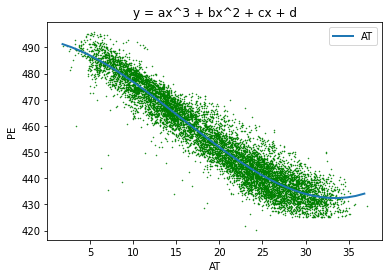

[492.72814334]
[[ 0.         -0.61034571 -0.12513818  0.00267485]]
AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:07:20   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

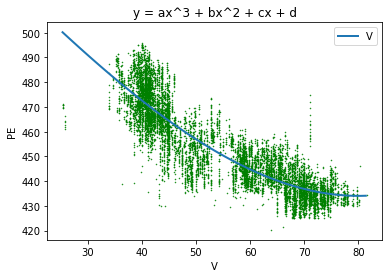

[554.14684906]
[[ 0.00000000e+00 -2.14437732e+00 -2.71228490e-03  1.34357110e-04]]
V
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:07:20   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

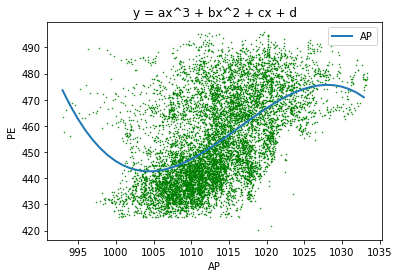

[5236220.00951946]
[[ 0.00000000e+00 -1.54608663e+04  1.52162527e+01 -4.99115998e-03]]
AP
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:07:21   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

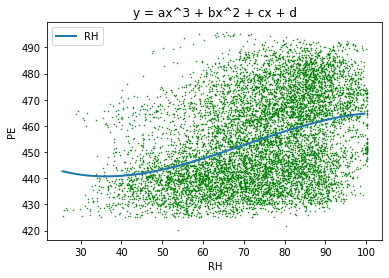

[468.41353597]
[[ 0.00000000e+00 -1.72921131e+00  3.21451721e-02 -1.52187969e-04]]
RH
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:07:21   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [13]:
for predictor in x_train:
    
    x_predictor = data[predictor].values
    x_predictor = x_predictor.reshape(-1, 1)
    y_response = data["PE"].values
    y_response = y_response.reshape(-1, 1)

    linreg = LinearRegression()
    x_fit = np.arange(data[predictor].min(), data[predictor].max(), 1).reshape(-1, 1)
    multi_model = PolynomialFeatures(degree = 3)
    linreg.fit(multi_model.fit_transform(x_predictor), y_response)
    yy = linreg.predict(multi_model.fit_transform(x_fit))

    plt.plot(x_predictor,y_response,"g.",markersize = 1)
    plt.title("y = ax^3 + bx^2 + cx + d")
    plt.xlabel(predictor)
    plt.ylabel("PE")
    plt.plot(x_fit,yy,label=predictor,lw= 2)
    plt.legend()
    plt.show()
    
    stat_x_predictor = np.column_stack((x_predictor, x_predictor**2, x_predictor**3))
    stat_x_predictor = sm.add_constant(stat_x_predictor)
    model_stat_x_pred = sm.OLS(y_response,stat_x_predictor).fit()
    
    print(linreg.intercept_)
    print(linreg.coef_)
    print(predictor)
    print(model_stat_x_pred.summary())



(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically signiﬁcant.
data = pd.read_excel(xls, 'Sheet1', index = False)


In [14]:
#from d: x_train2 = data[["AT","V","AP","RH"]]

x_interaction = data[["AT","V"]].values
x_interaction = x_interaction[:, 0] * x_interaction[:, 1]

df1 = pd.DataFrame(x_interaction, columns = ["AT*V"])
x_interaction = data[["AT","AP"]].values
x_interaction = x_interaction[:, 0] * x_interaction[:, 1]

df2 = pd.DataFrame(x_interaction, columns = ["AT*AP"])
x_interaction = data[["AT","RH"]].values
x_interaction = x_interaction[:, 0] * x_interaction[:, 1]

df3 = pd.DataFrame(x_interaction, columns = ["AT*RH"])
x_interaction = data[["V","AP"]].values
x_interaction = x_interaction[:, 0] * x_interaction[:, 1]

df4 = pd.DataFrame(x_interaction, columns = ["V*AP"])
x_interaction = data[["V","RH"]].values
x_interaction = x_interaction[:, 0] * x_interaction[:, 1]

df5 = pd.DataFrame(x_interaction, columns = ["V*RH"])
x_interaction = data[["AP","RH"]].values
x_interaction = x_interaction[:, 0] * x_interaction[:, 1]

df6 = pd.DataFrame(x_interaction, columns = ["AP*RH"])


frame = [x_train2, df1, df2, df3, df4, df5, df6]
result = pd.concat(frame,axis=1)
y_interaction = data["PE"].values
y_interaction = y_interaction.reshape(-1, 1)

result = sm.add_constant(result)
model = sm.OLS(y_interaction, result).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:07:21   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

=> Associations between AT and V, AT and RH, V and AP are statistically significant.

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insigniﬁcant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [15]:
AT_x = data["AT"].values
AT_x = AT_x.reshape(-1, 1)
AT_x = np.column_stack((AT_x, AT_x**2))
AT_x = pd.DataFrame(AT_x, columns=["AT","AT^2"])

AP_x = data["AP"].values
AP_x = AP_x.reshape(-1, 1)
AP_x = np.column_stack((AP_x, AP_x**2))
AP_x = pd.DataFrame(AP_x, columns=["AP","AP^2"])

V_x = data["V"].values
V_x = V_x.reshape(-1, 1)
V_x = np.column_stack((V_x, V_x**2))
V_x = pd.DataFrame(V_x, columns=["V","V^2"])

RH_x = data["RH"].values
RH_x = RH_x.reshape(-1, 1)
RH_x = np.column_stack((RH_x, RH_x**2))
RH_x = pd.DataFrame(RH_x, columns=["RH","RH^2"])

frame2 = [df1, df2, df3, df4, df5, df6, AT_x, V_x, AP_x, RH_x]
all_x = pd.concat(frame2,axis=1)

y_response = data["PE"].values
y_response = y_response.reshape(-1, 1)

all_y = data["PE"]
all_xy = pd.concat([all_x, all_y], axis = 1)
sample = all_xy.sample(n=None, frac = 0.7)
all_x_train = sample.iloc[:,0:14]
all_y_train = sample["PE"]

all_single = all_xy[["AT","V","AP","RH","PE"]]
sample_single = sample[["AT","V","AP","RH","PE"]]
x_train_single = sample_single.iloc[:,0:4]
y_train_single = sample_single["PE"]

x_train_single = sm.add_constant(x_train_single)
model_single = sm.OLS(y_train_single,x_train_single).fit()
train_pred_single = model_single.predict(x_train_single)
MSE_train_single = metrics.mean_squared_error(y_train_single, train_pred_single)

x_test_single = all_single.drop(sample_single.index).iloc[:, 0:4]
y_test_single = all_single.drop(sample_single.index)["PE"]
x_test_single = sm.add_constant(x_test_single)
test_pred_single = model_single.predict(x_test_single)
MSE_test_single = metrics.mean_squared_error(y_test_single, test_pred_single)

all_x_train = sm.add_constant(all_x_train)
model_all = sm.OLS(all_y_train, all_x_train).fit()
train_pred = model_all.predict(all_x_train)
MSE_train_all = metrics.mean_squared_error(all_y_train, train_pred)
                        
all_x_test = all_xy.drop(sample.index).iloc[:, 0:14]
all_y_test = all_xy.drop(sample.index)["PE"]
all_x_test = sm.add_constant(all_x_test)
test_pred = model_all.predict(all_x_test)
MSE_test_all = metrics.mean_squared_error(all_y_test, test_pred)
                        
print(model_single.summary())
print("MSE of variable model using train data:", MSE_train_single)
print("MSE of variable model using test data:", MSE_test_single) 
print("\n")
                        
print(model_all.summary())                        
print("MSE of all variable model using train data:", MSE_train_all)                        
print("MSE of all variable model using test data:", MSE_test_all)
print("\n")

remaining_y = data["PE"]
remaining_xy = all_xy[["AT*V","AT*RH","AT^2","AP","AP*RH","AP^2","RH","RH^2","PE"]]
remaining_sample = sample[["AT*V","AT*RH","AT^2","AP","AP*RH","AP^2","RH","RH^2","PE"]]

remaining_x_train = remaining_sample.iloc[:,0:8]
remaining_y_train = remaining_sample["PE"]
remaining_x_train = sm.add_constant(remaining_x_train)
model_remaining = sm.OLS(remaining_y_train,remaining_x_train).fit()
train_pred_remaining = model_remaining.predict(remaining_x_train)
MSE_train_remaining = metrics.mean_squared_error(remaining_y_train,train_pred_remaining)

remaining_x_test = remaining_xy.drop(remaining_sample.index).iloc[:, 0:8]
remaining_y_test = remaining_xy.drop(remaining_sample.index)["PE"]
remaining_x_test = sm.add_constant(remaining_x_test)
test_pred_remaining = model_remaining.predict(remaining_x_test)
MSE_test_remaining = metrics.mean_squared_error(remaining_y_test,test_pred_remaining)
                           
print(model_remaining.summary())
print("MSE of significant variable model using train data:", MSE_train_remaining)
print("MSE of significant variable model using test data:", MSE_test_remaining)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.145e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:07:21   Log-Likelihood:                -19697.
No. Observations:                6698   AIC:                         3.940e+04
Df Residuals:                    6693   BIC:                         3.944e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        450.1925     11.651     38.641      0.0

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best ﬁt. Plot the train and test errors in terms of 1/k.


Best value of k:  3
Best value:  1.463203264791113e-06




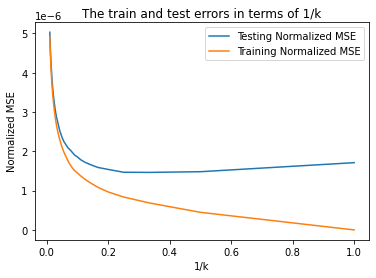

In [16]:
#Normalized features

best_k = 0
best_score = 1000

knn_data = data[["AT","V","AP","RH","PE"]]
knn_train= knn_data.sample(n=None,frac =0.7)
knn_test= knn_data.drop(knn_train.index)[["AT","V","AP","RH","PE"]]

knn_train1 = knn_train[["AT","V","AP","RH","PE"]]
knn_train1 = knn_train1.values
normalizer = preprocessing.Normalizer().fit(knn_train1)
knn_train1 = normalizer.transform(knn_train1)
knn_train1 = pd.DataFrame(knn_train1,columns=["AT","V","AP","RH","PE"])

knn_test1 = knn_test[['AT', 'V', 'AP', 'RH','PE']]
knn_test1 = knn_test1.values
normalizer = preprocessing.Normalizer().fit(knn_test1)
knn_test1 = normalizer.transform(knn_test1)
knn_test1 = pd.DataFrame(knn_test1,columns=["AT","V","AP","RH","PE"])

df_x_train = knn_train1[["AT","V","AP","RH"]]
df_y_train = knn_train1[["PE"]]
df_x_test = knn_test1[["AT","V","AP","RH"]]
df_y_test = knn_test1[["PE"]]

neighbor = np.arange(1,101)
train_error =np.empty(len(neighbor))
test_error = np.empty(len(neighbor))

for i,k in enumerate(neighbor):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(df_x_train, df_y_train)
    knn_y_train = knn.predict(df_x_train)
    knn_y_test = knn.predict(df_x_test)
    train_e = metrics.mean_squared_error(df_y_train, knn_y_train)
    test_e = metrics.mean_squared_error(df_y_test, knn_y_test)
    
    if test_e < best_score:
        best_score = test_e
        best_k = k
        
    train_error[i] = train_e
    test_error[i] = test_e
    
print("Best value of k: ",best_k)
print("Best value: ", best_score)
print("\n")

plt.plot(1/neighbor,test_error,label="Testing Normalized MSE")
plt.plot(1/neighbor,train_error,label="Training Normalized MSE")
plt.title("The train and test errors in terms of 1/k")
plt.xlabel("1/k")
plt.ylabel("Normalized MSE")
plt.legend()
plt.show()


Best value of k:  5
Best value:  15.966244572822312




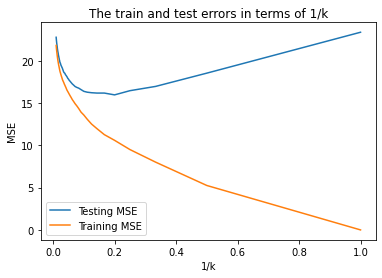

In [17]:
#Raw Features

best_k = 0
best_score = 1000000
neighbor = np.arange(1,101)
train_error =np.empty(len(neighbor))
test_error = np.empty(len(neighbor))

knn_data = data[["AT","V","AP","RH","PE"]]
df_x_train = knn_train[["AT","V","AP","RH"]]
df_y_train = knn_train[["PE"]]

df_x_test = knn_test[["AT","V","AP","RH"]]
df_y_test = knn_test["PE"]

for i,k in enumerate(neighbor):
    knn = KNeighborsRegressor(n_neighbors=k,p=2)
    knn.fit(df_x_train, df_y_train)
    knn_y_train = knn.predict(df_x_train)
    knn_y_test = knn.predict(df_x_test)
    train_e = metrics.mean_squared_error(df_y_train,knn_y_train)
    test_e = metrics.mean_squared_error(df_y_test,knn_y_test)
    
    if test_e < best_score:
        best_score = test_e
        best_k = k
        
    train_error[i] = train_e
    test_error[i] = test_e

print("Best value of k: ",best_k)
print("Best value: ", best_score)
print("\n")

plt.plot(1/neighbor,test_error,label="Testing MSE")
plt.plot(1/neighbor,train_error,label="Training MSE")
plt.title("The train and test errors in terms of 1/k")
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.legend()
plt.show()

(j) Compare the results of KNN Regression with linear regression and provide your analysis.


In [18]:
k = 1
best_score = 1

knn_data = data[["AT","V","AP","RH","PE"]]
df_x_train = knn_data[["AT","V","AP","RH"]]
df_y_train = knn_data[["PE"]]

while k < 101:
    knn = KNeighborsRegressor(n_neighbors = k, p = 2)
    knn.fit(df_x_train,df_y_train)
    knn_pred = knn.predict(df_x_train)
    temp_score = metrics.r2_score(df_y_train, knn_pred)
    
    if temp_score < best_score:
        best_score = temp_score
    k += 1

linreg = LinearRegression()
model = linreg.fit(df_x_train, df_y_train)
linreg_pred = model.predict(df_x_train)
score = metrics.r2_score(df_y_train,linreg_pred)

print("R^2 of the KNN: ",best_score)
print("R^2 of the Linear regression ", score)


R^2 of the KNN:  0.9298793885143463
R^2 of the Linear regression  0.9286960898122536


=> KNN Linear Regression is better.